<a href="https://colab.research.google.com/github/denilson2509a/cd_202202_fabio_villamizar/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyproj


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 4.3 MB/s 


In [ ]:
import pandas as pd


In [ ]:
ruta= "https://foscalinternacional.com/datasets/eventos_dengue_2020.csv"
df= pd.read_csv(ruta)

In [ ]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df.dtypes


ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [ ]:
from datetime import datetime

df['fec_not_2'] = pd.to_datetime(df['fec_not'], format='%d/%m/%Y')
df["fec_hos_2"] = pd.to_datetime(df["fec_hos_"], format="%d/%m/%Y")
df["fec_contagio_2"] = pd.to_datetime(df["fecha_contagio"], format="%d/%m/%Y")
df["inicio_sintomas_2"] = pd.to_datetime(df["inicio_sintomas"], format="%d/%m/%Y")


In [ ]:
import pyproj

In [ ]:
P = pyproj.Proj(proj='utm',zone=18,ellps='WGS84',preserve_units=True)

In [ ]:
df['x'],df['y']= P(df['longitud'],df['latitud'])

alcaldia= 7.063016146691124, -73.08620423577148

In [53]:
lat_alcaldia=73.08
lon_alcaldia=7.06

x_alcaldia, y_alcaldia=P(lon_alcaldia,lat_alcaldia)
x_alcaldia, y_alcaldia

(2397132.104179374, 9729392.857310599)

In [ ]:
import numpy as np

df['distancia'] = np.sqrt((pow(df['x'],2)- pow(711393.5,2))+(pow(df['y'],2)- pow(781143.1,2)))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
datosf = df

datosf = datosf.select_dtypes (exclude = ['object', 'datetime64'])
datosf = datosf.drop('año', axis = 1)
datosf = datosf.drop ('cod_pais_o', axis = 1)
datosf = datosf.drop('condicion_final', axis = 1)
datosf = datosf.drop('fecha_defuncion', axis = 1)
datosf = datosf.drop('certif_defuncion', axis = 1)

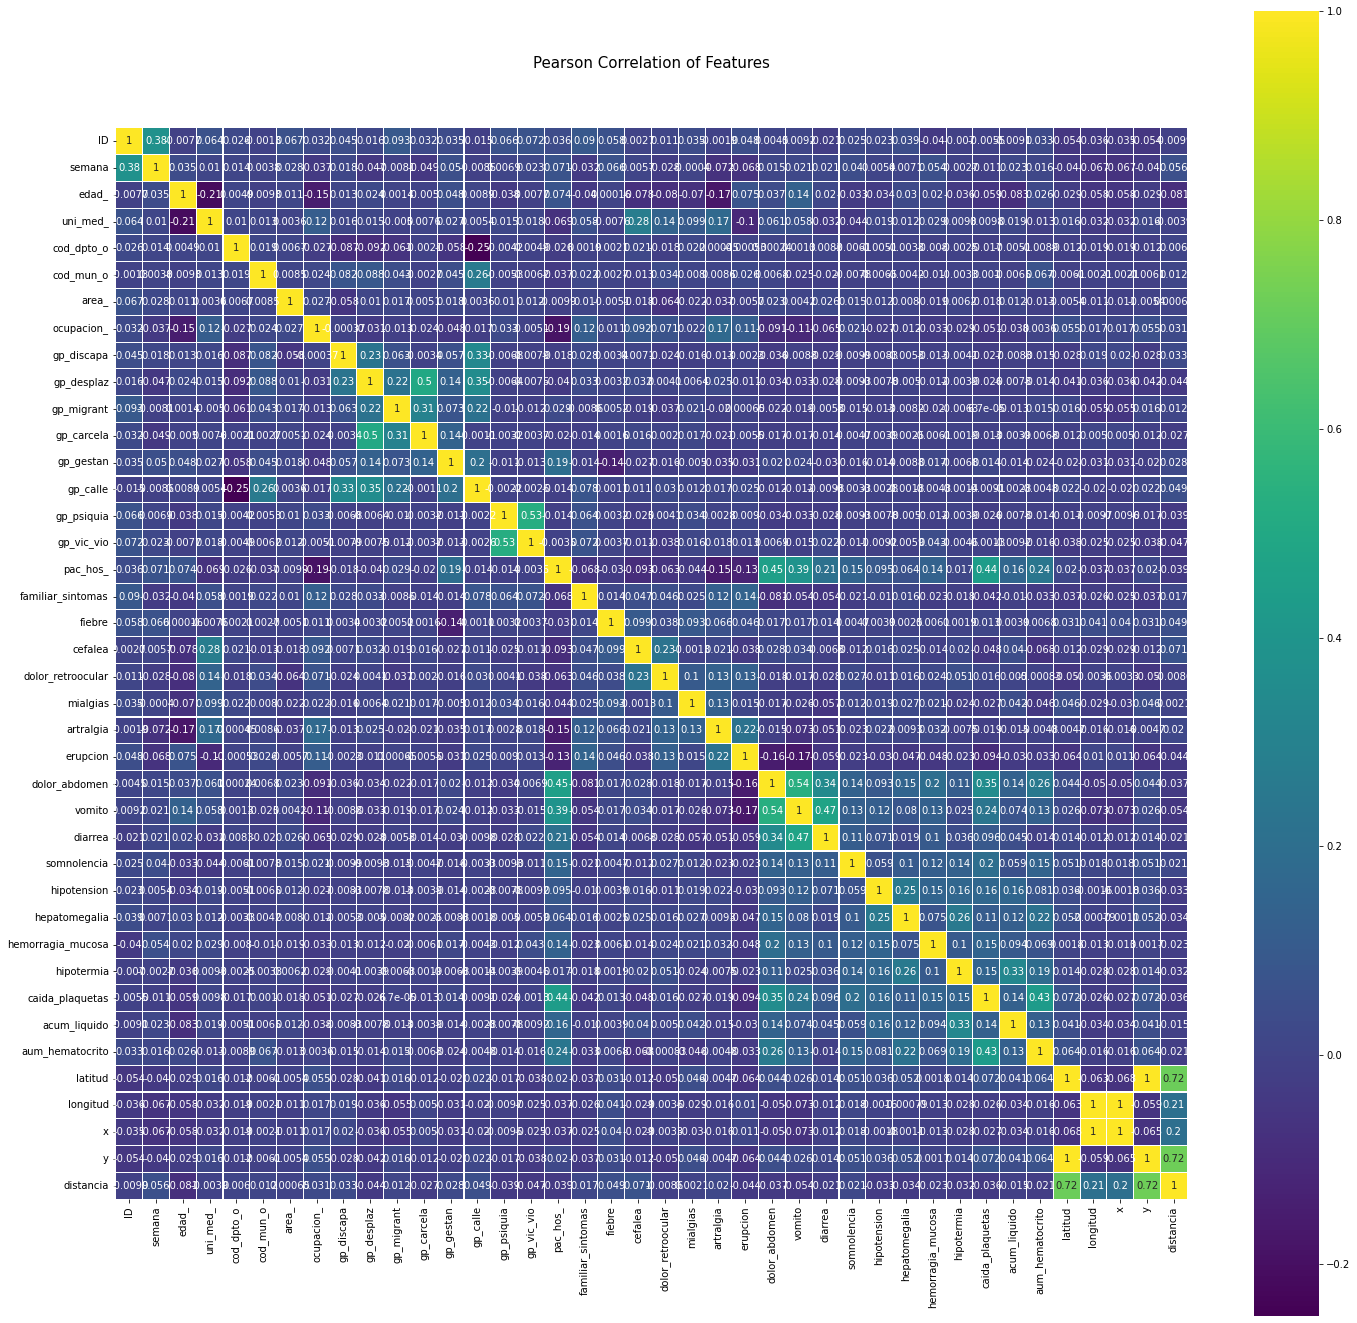

In [ ]:
import matplotlib. pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt. figure (figsize=(24,24))
plt. title( 'Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)


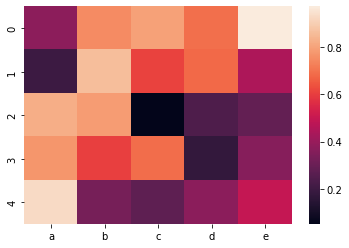

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import da

# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

# Default heatmap
p1 = sns.heatmap(df)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.corr()

,a,b,c,d,e
a,1.000000,-0.723471,-0.641145,-0.866372,-0.463361
b,-0.723471,1.000000,0.212870,0.412933,0.056687
c,-0.641145,0.212870,1.000000,0.514121,0.614900
d,-0.866372,0.412933,0.514121,1.000000,0.706848
e,-0.463361,0.056687,0.614900,0.706848,1.000000


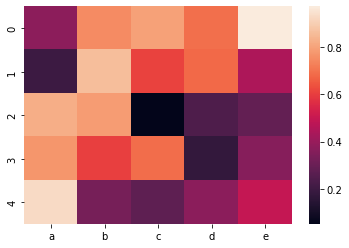

In [ ]:
sns.heatmap(df.corr());

In [ ]:
df.max()

a    0.931666
b    0.864609
c    0.796890
d    0.692900
e    0.972579
dtype: float64